# Please answer the following questions related to Machine Learning concepts:#

**1. Explain the following concepts:**


(1) Supervised Learning:
        
      In supervised learning we teach or train the machine using the data which is already tagged with correct answer. Hence whenever we provide the new set of data, supervise learning algorithm analyses this new data based on the training data(correctly labelled data) and produces the correct outcome.
      
 
(2) Unsupervised Learning: 
       
       In unsupervised learning, machine is provided with the unlabeled data, which is neither correctly tagged nor classified, the algorithm is allowed to act on the information without any guidance(supervision). Hence, machine is confined to find the hidden structure in unlabeled data by it-self. When we provide the testing data, machine will find the relation between the training data and testing data, accordingly classifies and gives output.
       
       
(3) Online learning:

        The online learning allows us to tackel problems where we have a continuous flood or a continuous stream of data coming in and we allow our algorithm to learn from that incoming data. Online learning algorithm learns from the stream of data and use that to optimize some of the decisions.
        
(4) Batch learning: 
        
       In batch learning, whole training set is used to compute the current model performance. Suppose, in gradient descent algorithms, we update the parameters using cumulative gradient. If all training examples are visible before the update, then it’s called batch learning.
       
(5) Model-based learning:
        
       Machine learning models are parameterized with a certain number of parameters, these parameters remains same irrespective of the size of training data. These kind of models are called as Model based Machine learning algorithm.
       
(6) Instance based learning

       A hypotheses directly constructed from the training instances themselves in the instance based learning. This means that  as the new data is feeded, the hypothesis complexity may grow with the data.
    

# Programming Problem:#

Write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.


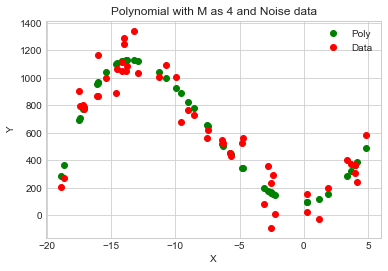

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib inline
noise_scale = 100
number_of_samples = 50
#np.random.seed(50)
x = 25*(np.random.rand(number_of_samples) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples)
p_coeff = np.polyfit(x,y,4)
ynew = np.poly1d(p_coeff)
plt.plot(x,ynew(x),'go',label="Poly")
plt.plot(x,y,'ro',label="Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title('Polynomial with M as 4 and Noise data')
plt.show()

**Question 1:** Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

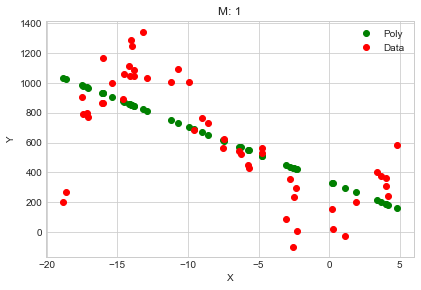

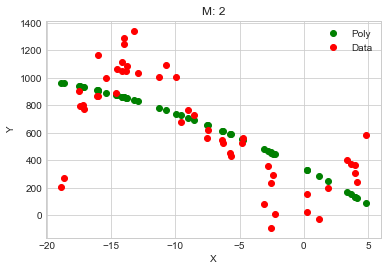

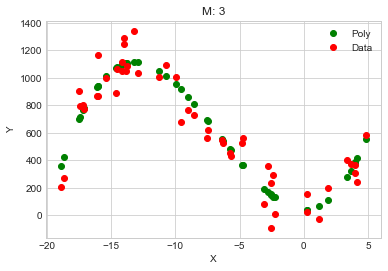

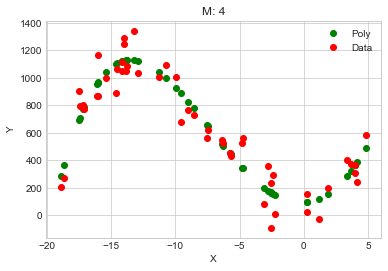

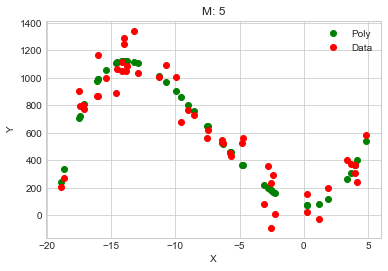

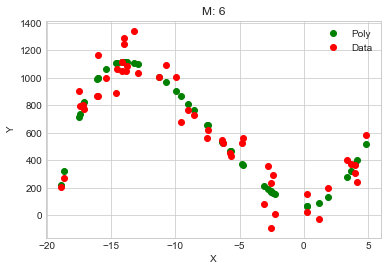

In [2]:
fig = plt.figure(figsize=(14.5,20))
mse = []
m = list(range(1,9))
for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    p_coeff = np.polyfit(x,y,i)
    ynew = np.poly1d(p_coeff)
    mse.append((((y-ynew(x))**2).sum())/number_of_samples)
    if i in (7,8):
        continue
    plt.plot(x,ynew(x),'go',label="Poly")
    plt.plot(x,y,'ro',label="Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("M: "+str(i))
    plt.show()

**Question 2:** Plot MSE versus order m for m = 1, 2, 3, 4, 5, 6, 7, 8. Identify the best choice of order m.

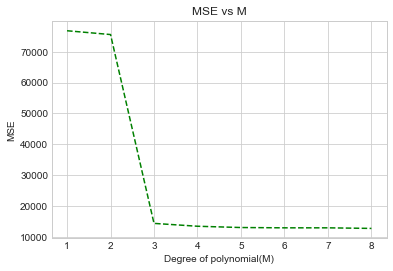

In [3]:
plt.plot(m,mse,"--g")
plt.xlabel("Degree of polynomial(M)")
plt.ylabel("MSE")
plt.title("MSE vs M")
plt.show()

From the above observation, since there is no significant decrease in the MSE after degree 4 and higher the degree implies complex the calculation. Therefore, to avoid complex calculations and over fitting of polynomial, I choose **M = 4** as my best fit for polynomial. Henceforth, below computations are done using M as 4.

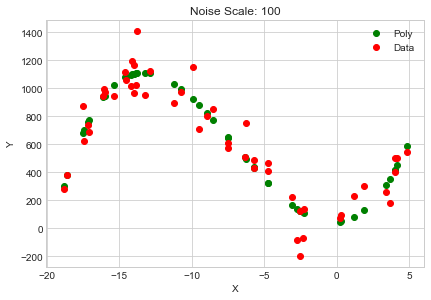

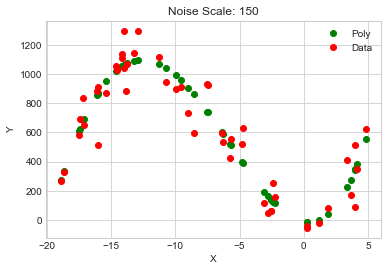

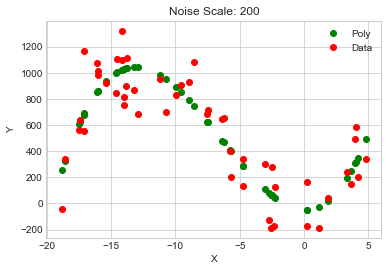

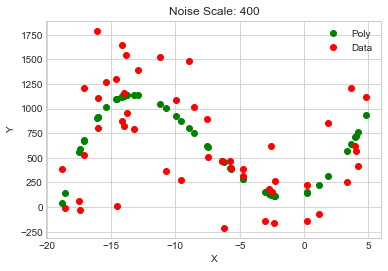

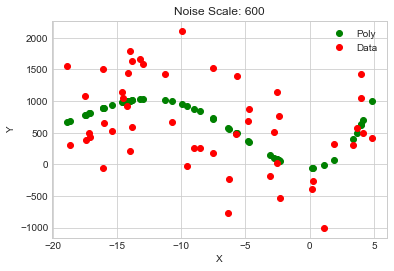

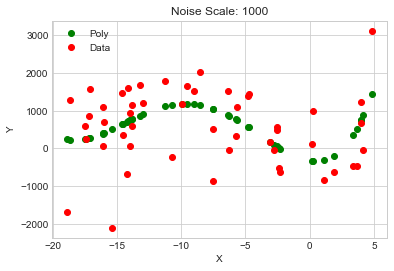

In [4]:
noise_scale = [100,150, 200, 400, 600, 1000]
fig = plt.figure(figsize=(23,10))
for i in range(1,7):
    axi = fig.add_subplot(2, 3, i)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale[i-1]*np.random.randn(number_of_samples)
    p_coeff = np.polyfit(x,y,4)
    ynew = np.poly1d(p_coeff)
    plt.plot(x,ynew(x),'go',label="Poly")
    plt.plot(x,y,'ro',label="Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("Noise Scale: "+str(noise_scale[i-1]))
    plt.show()

Everytime the random noise is introduce in the data. This noise affects the training of our model. More the noise we introduce in our data, worst will be the training of our model. 

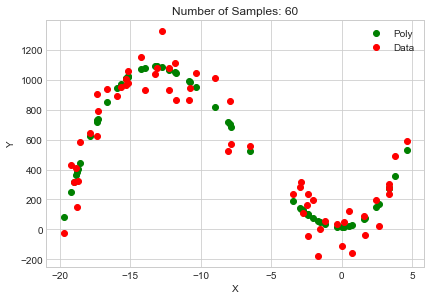

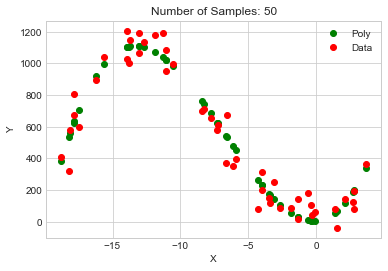

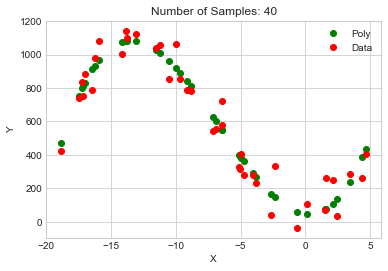

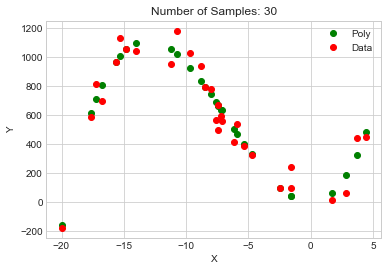

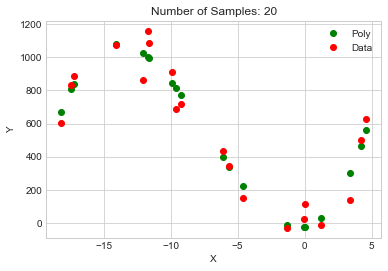

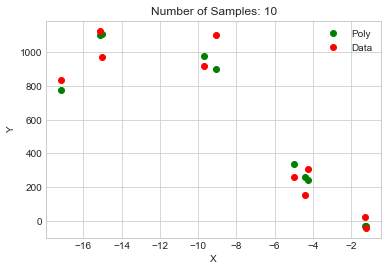

In [5]:
noise_scale = 100
fig = plt.figure(figsize=(23,10))
number_of_samples = [60, 50, 40, 30, 20, 10]
mse = []
for i in range(1,7):
    axi = fig.add_subplot(2, 3, i)
    x = 25*(np.random.rand(number_of_samples[i-1]) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples[i-1])
    p_coeff = np.polyfit(x,y,3)
    ynew = np.poly1d(p_coeff)
    mse.append((((y- ynew(x))**2).sum())/number_of_samples[i-1])
    plt.plot(x,ynew(x),'go',label="Poly")
    plt.plot(x,y,'ro',label="Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("Number of Samples: "+str(number_of_samples[i-1]))
    plt.show()

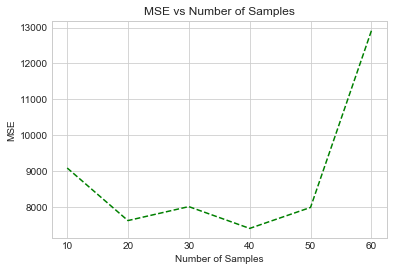

In [6]:
plt.plot(number_of_samples,mse,"--g")
plt.xlabel("Number of Samples")
plt.ylabel("MSE")
plt.title("MSE vs Number of Samples")
plt.show()

Since, the noise is randomly added each time, MSE tends to change. If the model is well trained, the number of samples does not impact that much. The variation of MSE is just because of the randomness of noise. But if there is too few samples, the model is not well trained. Then the MSE is expected to be large.
